In [1]:
import sklearn
print(sklearn.__version__)
#result: 1.2.2

1.1.3


In [2]:
!pip install scikit-learn==1.1.3

In [3]:
"""#best trick to get the boston dataset without downgrading sklearn
import warnings

warnings.filterwarnings('ignore')

from fairlearn.datasets import fetch_boston

import pandas as pd

pd.set_option('display.max_columns', 20)

pd.set_option('display.width', 80)

data = fetch_boston()

#boston_housing=pd.concat([X, y], axis=1)

with pd.option_context('expand_frame_repr', False):

   boston_housing.head()"""

"#best trick to get the boston dataset without downgrading sklearn\nimport warnings\n\nwarnings.filterwarnings('ignore')\n\nfrom fairlearn.datasets import fetch_boston\n\nimport pandas as pd\n\npd.set_option('display.max_columns', 20)\n\npd.set_option('display.width', 80)\n\ndata = fetch_boston()\n\n#boston_housing=pd.concat([X, y], axis=1)\n\nwith pd.option_context('expand_frame_repr', False):\n\n   boston_housing.head()"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
#data = fetch_boston()
data.keys()
# feature selection and engineering is already mainly taken care of for us by authors of dataset
# https://scikit-learn.org/stable/datasets/index.html#boston-dataset

/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

----------------------------------------

dataset explained:
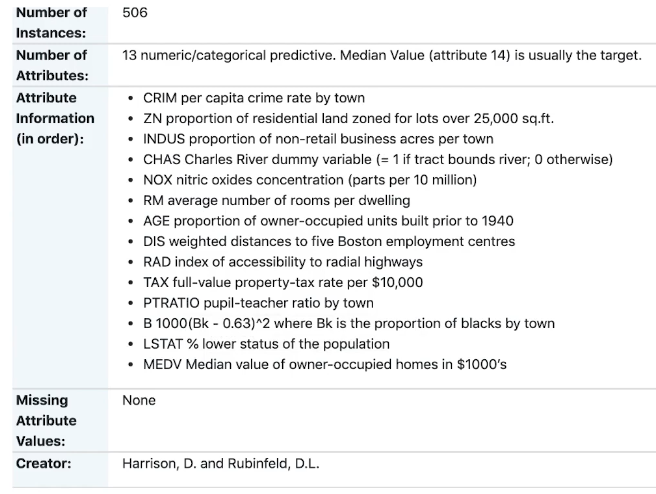

-----------------

In [6]:
X, y = data["data"], data["target"]

In [7]:
#X['CHAS'] = X['CHAS'].astype(float)
#X['RAD'] = X['RAD'].astype(float)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = pd.DataFrame(X_train,columns=data["feature_names"])
X_test = pd.DataFrame(X_test,columns=data["feature_names"])
y_train = pd.DataFrame(y_train,columns=["target"])
y_test = pd.DataFrame(y_test,columns=["target"])
X_train.info() # Don't have any null values but may want to think about null value strategy in case
                # we later encounter null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [9]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
1,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
2,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
3,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


/tmp/ipykernel_15774/953818519.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax=ax)


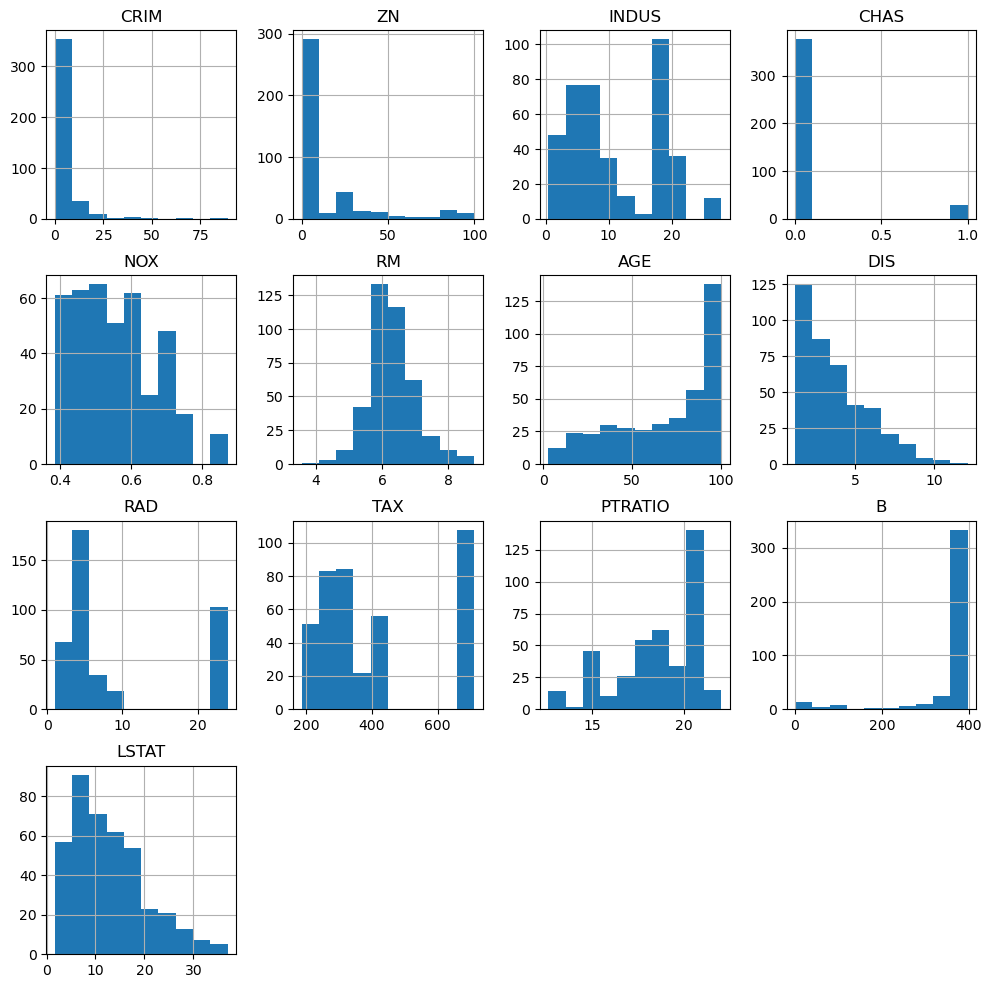

In [10]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
X_train.hist(ax=ax)
plt.show()

#result: B (many maximum results), CHAS (binary, many zeroes), CRIM+DIS (right skewed),
#INDUS (bimodal distribution)

In [11]:
X_train.describe()# looking at percentiles to get quick sense of distribution in smaller scales

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.386324,11.794554,11.123441,0.069307,0.555886,6.301797,69.027228,3.770242,9.403465,402.844059,18.462376,358.785446,12.706188
std,8.137943,23.636906,6.993011,0.254290,0.115201,0.694692,28.106955,2.080583,8.661147,170.857022,2.194821,88.663438,7.299031
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.078935,0.000000,5.130000,0.000000,0.449000,5.887750,45.675000,2.087875,4.000000,276.000000,17.400000,376.132500,6.727500
50%,0.256510,0.000000,9.125000,0.000000,0.538000,6.211000,77.950000,3.190950,5.000000,322.000000,19.100000,391.600000,11.300000
75%,3.359357,20.000000,18.100000,0.000000,0.631000,6.675000,93.900000,5.141475,24.000000,666.000000,20.200000,396.060000,17.112500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


/tmp/ipykernel_15774/3987818636.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(X_train,ax=ax,c=y_train["target"],alpha=0.5)


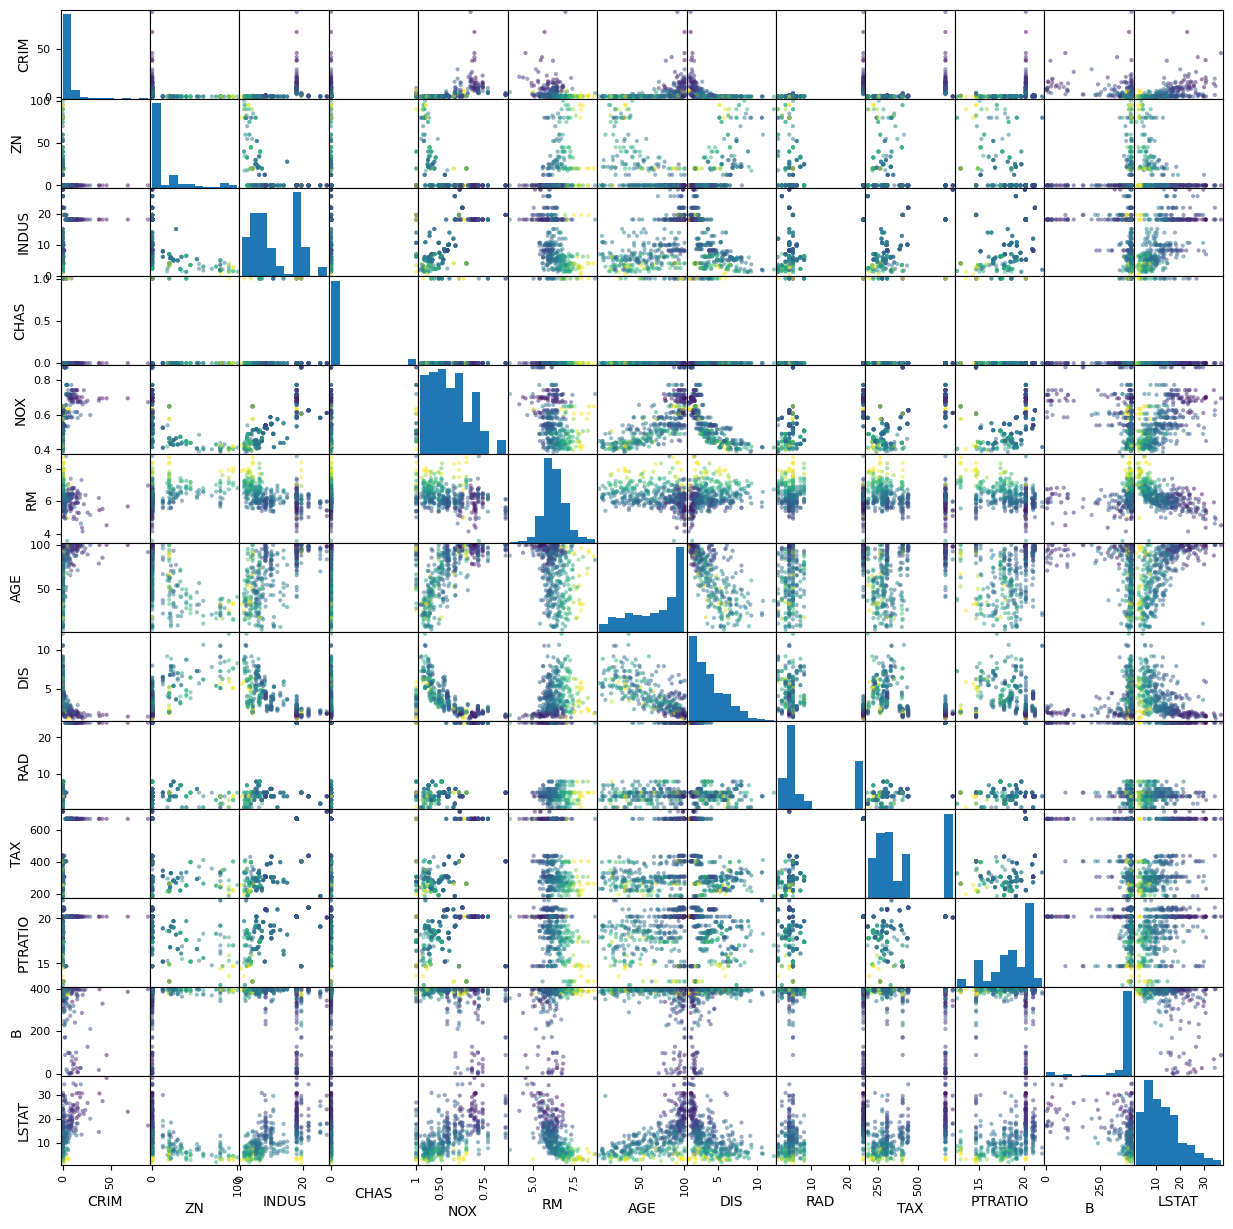

In [12]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
pd.plotting.scatter_matrix(X_train,ax=ax,c=y_train["target"],alpha=0.5)
plt.show()
# visually we can see color separation across range of values

In [13]:
#color code for correlation (here: error in data)
pd.concat([X_train,y_train],axis=1).corr()[["target"]] \
            .sort_values("target",ascending=False) \
            .style.background_gradient(cmap="summer")

,target
target,1.000000
RM,0.705039
ZN,0.409824
B,0.354226
DIS,0.281013
CHAS,0.177620
CRIM,-0.411133
AGE,-0.413340
RAD,-0.425133
NOX,-0.459566


array([[<Axes: title={'center': 'target'}>]], dtype=object)

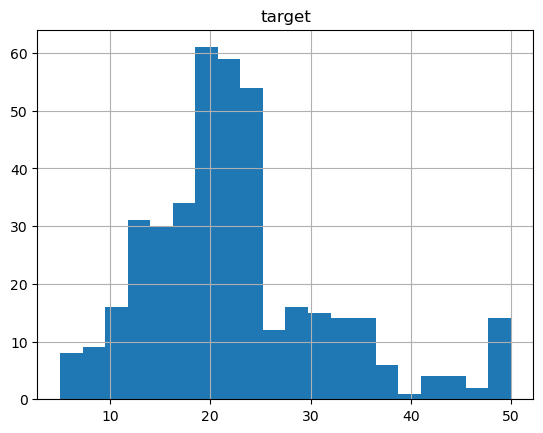

In [14]:
y_train.hist(bins=20)
# investigate train target distribution to see if we notice anything particular